In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

<AxesSubplot:>

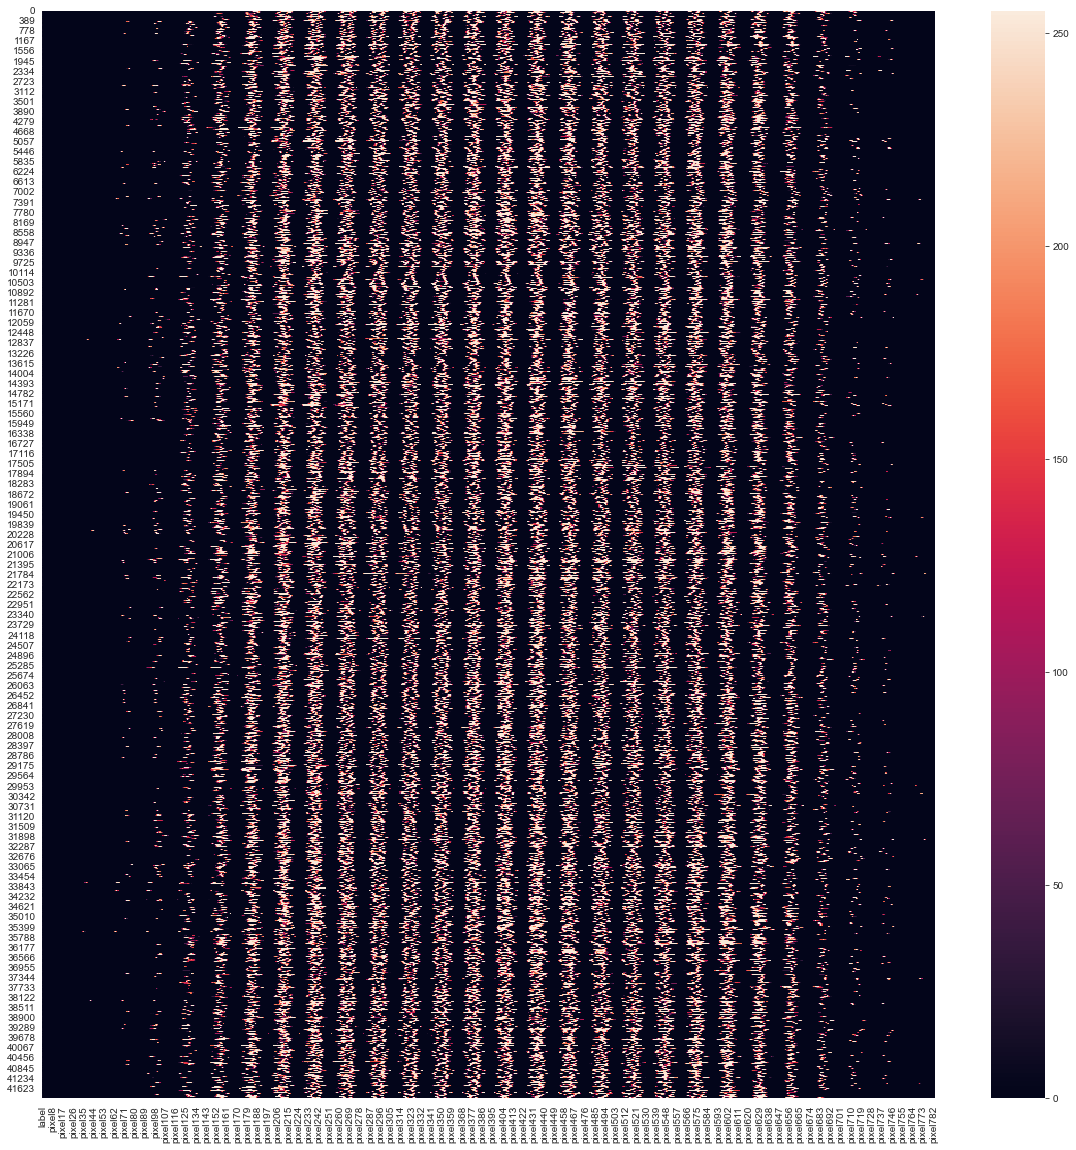

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop("label",axis=1).values
y=df["label"].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
logreg=LogisticRegression( max_iter=50000)

In [10]:
logreg.fit(X_train,y_train)

C:\Users\fAhRi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50000)

In [11]:
predict=logreg.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1213
           1       0.93      0.94      0.94      1422
           2       0.87      0.85      0.86      1258
           3       0.86      0.87      0.87      1284
           4       0.89      0.91      0.90      1209
           5       0.85      0.82      0.83      1121
           6       0.91      0.92      0.92      1242
           7       0.91      0.91      0.91      1315
           8       0.84      0.84      0.84      1227
           9       0.88      0.87      0.87      1309

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600



In [14]:
print(confusion_matrix(y_test,predict))

[[1132    0   21    6    3   18   18    4    6    5]
 [   1 1337   20   10    2    6    3    5   35    3]
 [  14   23 1065   30   22   10   28   24   32   10]
 [  15    8   31 1115    6   39    8   20   22   20]
 [   6    6   15    1 1100    4   20   10    8   39]
 [  22   13   12   49   19  921   28    3   43   11]
 [  11    9   24    2   13   19 1146    1   17    0]
 [   5    8   13   12   20    6    0 1194    9   48]
 [  11   23   20   42   11   48    9    6 1032   25]
 [   6    5    7   23   43   16    0   48   20 1141]]


In [15]:
metrics=confusion_matrix(y_test,predict)

In [16]:
score = logreg.score(X_test, y_test)


In [17]:
score

0.8875396825396825

<AxesSubplot:>

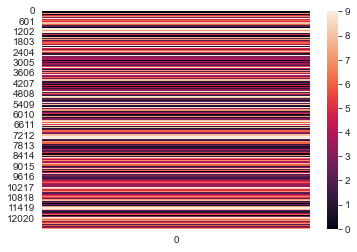

In [18]:
sns.heatmap(predict[:, np.newaxis])


In [19]:
predict 

array([5, 3, 0, ..., 9, 3, 6], dtype=int64)

In [20]:
df["label"].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [35]:
prediction = pd.DataFrame(predict,columns=["Predict"])

In [22]:
prediction["Predict"].unique()

array([5, 3, 0, 1, 9, 7, 2, 6, 4, 8], dtype=int64)

In [23]:
real=pd.DataFrame(y_test,columns=["Real"])

In [24]:
real

,Real
0,1
1,3
2,0
3,0
4,1
...,...
12595,5
12596,3
12597,9
12598,3


In [25]:
prediction

,Predict
0,5
1,3
2,0
3,0
4,1
...,...
12595,0
12596,3
12597,9
12598,3


In [26]:
prediction.columns = real.columns

print(prediction.eq(real).mean(axis=1) * 100)
print("\n")


0          0.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
12595      0.0
12596    100.0
12597    100.0
12598    100.0
12599    100.0
Length: 12600, dtype: float64




In [27]:
percentile=prediction.eq(real).mean(axis=1) * 100


In [28]:
percentile.mean()

88.75396825396825

<AxesSubplot:>

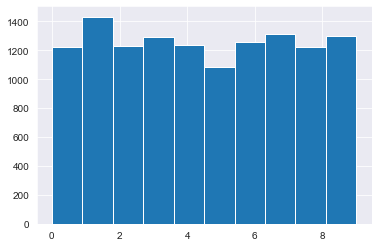

In [45]:
prediction["Predict"].hist(bins=10)


<AxesSubplot:>

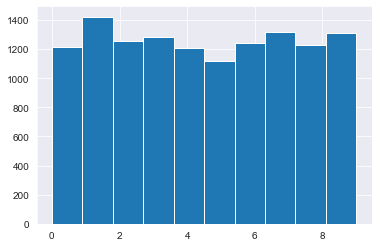

In [44]:
real["Real"].hist(bins=10)

<AxesSubplot:>

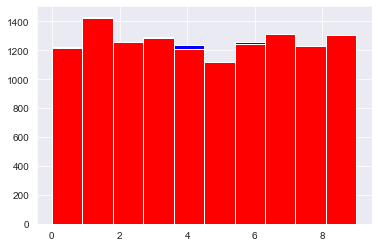

In [60]:
prediction["Predict"].hist(bins=10,color="b")
real["Real"].hist(bins=10,color="r")